# 1. Importing the necessary libraries

In [1]:
# Warnings are important in order to 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the necessary libraries
import pandas as pd 
#The package comes with several data structures that can be used for many different data manipulation tasks

import numpy as np
#NumPy aims to provide an array object that is up to 50x faster than traditional Python lists.

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 
# this function enables you view the plot inside the jupyter notebook
#from matplotlib import pyplot



In [3]:
#importing the machone learning algorithms 
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#importing the machine learning algorith filter
from sklearn.metrics import r2_score # this imports the r-square score


# 2. DATA EXPLORATION

 ### 2.1 Exploratory Data Analysis (EDA) and Univariate Data Analysis

In [113]:
#To read the csv file called data and save it in a pandas DataFranme called df
df = pd.read_csv("combined_data.csv")

# To view the first 5 rows of the Dataframe
df.head(5)

,"Bubble Point FVF (Boi, Rb/STB)","Solution gas-oil ratio (Rs, SCF/STB)","Reservoir Temperature (T, oF)",Gas specific gravity (Yg),Oil Specific gravity (Yo),Stock tank oil gravity ( oAPI)
0,1.047,23.262945,127.004,0.730,0.961,15.742456
1,1.041,20.225230,127.004,0.680,0.961,15.742456
2,1.040,16.182430,127.004,0.639,0.961,15.742456
3,1.038,12.134015,127.004,0.600,0.961,15.742456
4,1.036,7.080515,127.004,0.590,0.961,15.742456


In [5]:
# to view the last 5 rows of the dataframe
df.tail(5)

,"Bubble Point FVF (Boi, Rb/STB)","Solution gas-oil ratio (Rs, SCF/STB)","Reservoir Temperature (T, oF)",Gas specific gravity (Yg),Oil Specific gravity (Yo),Stock tank oil gravity ( oAPI)
66,1.587,913.257290,176.0,0.727,0.808,43.623762
67,1.473,697.837815,176.0,0.738,0.808,43.623762
68,1.369,506.691985,176.0,0.773,0.808,43.623762
69,1.269,293.293910,176.0,0.929,0.808,43.623762
70,2.215,2049.000000,203.0,0.650,0.802,44.930000


In [6]:
#To get the number of rows and columns (rows,colums)
df.shape

(71, 6)

In [7]:
# to know the different data types available use the below function
df.dtypes

Bubble Point FVF (Boi, Rb/STB)          float64
Solution gas-oil ratio (Rs, SCF/STB)    float64
Reservoir Temperature (T, oF)           float64
Gas specific gravity (Yg)               float64
Oil Specific gravity (Yo)               float64
Stock tank oil gravity ( oAPI)          float64
dtype: object

### 2.2 Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here.

In [8]:
# Checking for missing(null) values
df.info()
#There are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bubble Point FVF (Boi, Rb/STB)        71 non-null     float64
 1   Solution gas-oil ratio (Rs, SCF/STB)  71 non-null     float64
 2   Reservoir Temperature (T, oF)         71 non-null     float64
 3   Gas specific gravity (Yg)             71 non-null     float64
 4   Oil Specific gravity (Yo)             71 non-null     float64
 5   Stock tank oil gravity ( oAPI)        71 non-null     float64
dtypes: float64(6)
memory usage: 3.5 KB


In [9]:
# the code below is to check for duplicate rows
df[df.duplicated()==True]

,"Bubble Point FVF (Boi, Rb/STB)","Solution gas-oil ratio (Rs, SCF/STB)","Reservoir Temperature (T, oF)",Gas specific gravity (Yg),Oil Specific gravity (Yo),Stock tank oil gravity ( oAPI)


In [10]:
# Perentage of rows with some sort of duplicates
round(len(df[df.duplicated()==True])/len(df) * 100, 2)
# it is concluded that there are no duplicate rows for this dataset

0.0

In [11]:
# to get the 5 point statistical analysis of the dataframe
# .T is the same as .transpose() used to transpose how its viewed(this is optional)
#df.describe().T
df.describe()

,"Bubble Point FVF (Boi, Rb/STB)","Solution gas-oil ratio (Rs, SCF/STB)","Reservoir Temperature (T, oF)",Gas specific gravity (Yg),Oil Specific gravity (Yo),Stock tank oil gravity ( oAPI)
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,1.333366,607.583009,173.256535,0.665366,0.863396,32.952857
std,0.302467,610.020150,25.347939,0.074068,0.049913,8.771263
min,1.023000,7.080515,123.008000,0.564000,0.767000,15.742456
25%,1.080500,122.881467,166.010000,0.610000,0.824000,26.276286
50%,1.258000,404.543905,176.000000,0.650000,0.846000,35.757683
75%,1.552000,1045.500000,188.998000,0.700000,0.909000,40.225978
max,2.490000,2315.000000,245.000000,0.929000,0.961000,44.930000


In [12]:
#To check the skewness
df.skew()

Bubble Point FVF (Boi, Rb/STB)          1.433849
Solution gas-oil ratio (Rs, SCF/STB)    1.162851
Reservoir Temperature (T, oF)          -0.422977
Gas specific gravity (Yg)               1.174125
Oil Specific gravity (Yo)               0.505684
Stock tank oil gravity ( oAPI)         -0.561390
dtype: float64

### 2.3 Data Visualization

In [13]:
#Visualizing Bubble point FVF skew

#sns.distplot(df['Bubble Point FVF (Boi, Rb/STB)'], 
             #hist=1,
             #color = 'purple', 
             #kde=True) #Kernel density estimate

#plt.show()
#print(df['Reservoir Temperature (T, oF)'])

In [14]:
# Skewness of Bubble point FVF after log transformation
# We only do log transformation if data is skewed 

#sns.distplot(np.log(df['Bubble Point FVF (Boi, Rb/STB)']),hist=False, color = 'purple')
#plt.show()

# performing log transformation so that we reduce skewness

##### to visualize the skewness of each deliverable

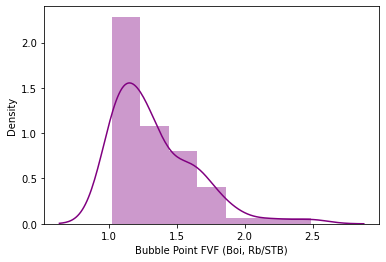

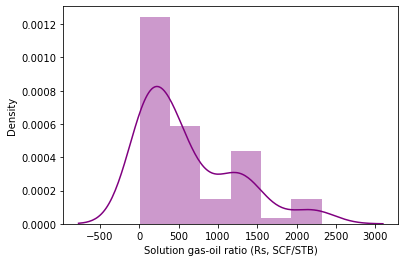

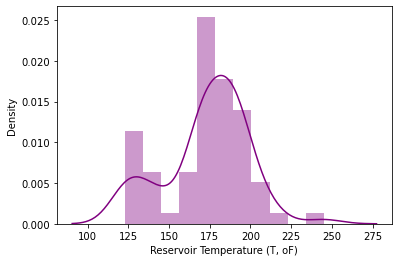

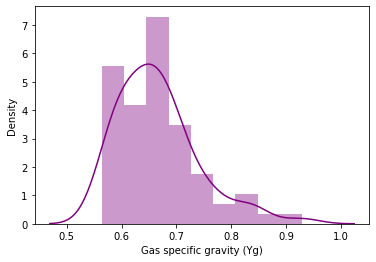

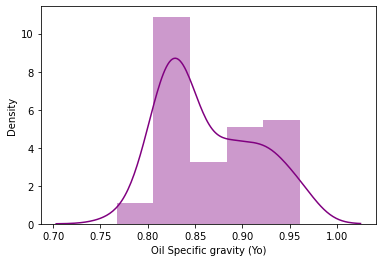

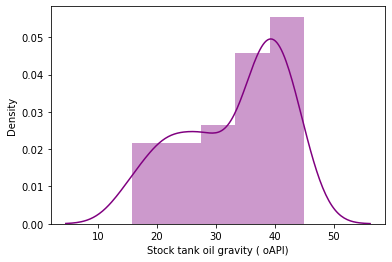

In [15]:
for each in df.columns:
    sns.distplot(df[each], hist=1, color = 'purple', kde=True)
    plt.show()

In [16]:
# Creating a function to create a DataFrame which would identify the outliers using the IQR Formula

In [17]:
#Calcualte the IQR

q1=df.quantile(0.25) #Lower quantile is 25% 
q3=df.quantile(0.75) #higher quantile is 75%
IQR=q3-q1 #IQR is Inter quartile range 

# Now we Test for Outliers from the concrete dataframe
outlier_test=(df.iloc[:] <(q1-1.5*IQR))| (df.iloc[:] > (q3+1.5*IQR))
outliers = outlier_test.sum(axis=0)

#Creating a Dataframe with the database attributes as the indexes and outliers as the column title
# It would be clearer when you glance at the output
outliers_df = pd.DataFrame(outliers,index=df.columns,columns=['No. of Outliers'])

# Calculating the percentage of outliers
outliers_df['Percentage Outliers']=round(outliers_df['No. of Outliers']*100/len(df),2)

outliers_df

,No. of Outliers,Percentage Outliers
"Bubble Point FVF (Boi, Rb/STB)",1,1.41
"Solution gas-oil ratio (Rs, SCF/STB)",0,0.00
"Reservoir Temperature (T, oF)",10,14.08
Gas specific gravity (Yg),3,4.23
Oil Specific gravity (Yo),0,0.00
Stock tank oil gravity ( oAPI),0,0.00


In [18]:
count  = 0
summation = 0


In [19]:
q1= df.iloc[0:71,2].quantile(0.25) #Lower quantile is 25% 
q3= df.iloc[0:71,2].quantile(0.75) #higher quantile is 75%
IQR=q3-q1 #IQR is Inter quartile range 

#outlier_test=( df.iloc[1:71,2] <(q1-1.5*IQR))| ( df.iloc[1:71,2] > (q3+1.5*IQR))
for values in df.iloc[0:71,2]: # this is to select the values not part of the outliers and get their mean
    if ( values >(q1-1.5*IQR))|( values < (q3+1.5*IQR)):
        summation = summation + values
        count = count + 1
mean = summation/count
#print(mean)
for values in df.iloc[0:71,2]:
    if ( values <(q1-1.5*IQR))|( values > (q3+1.5*IQR)):
        df['Reservoir Temperature (T, oF)'] =  df['Reservoir Temperature (T, oF)'].replace(values, mean)
#print(values)

#outliers = outlier_test.sum(axis=0)
#outlier_test


In [20]:
q1= df.iloc[0:71,2].quantile(0.25) #Lower quantile is 25% 
q3= df.iloc[0:71,2].quantile(0.75) #higher quantile is 75%
IQR=q3-q1 #IQR is Inter quartile range 

for values in df.iloc[0:71,2]:
    if ( values <(q1-1.5*IQR))|( values > (q3+1.5*IQR)):
        print(values)

141.008
141.008
141.008
141.008
144.0


q1= df.iloc[1:71,3].quantile(0.25) #Lower quantile is 25% 
q3= df.iloc[1:71,3].quantile(0.75) #higher quantile is 75%
IQR=q3-q1 #IQR is Inter quartile range 
mean = df.iloc[1:71,3].mean()
#outlier_test=( df.iloc[1:71,2] <(q1-1.5*IQR))| ( df.iloc[1:71,2] > (q3+1.5*IQR))
for values in df.iloc[1:71,3]:
    if ( values <(q1-1.5*IQR))|( values > (q3+1.5*IQR)):
        df['Gas specific gravity (Yg)'] =  df['Gas specific gravity (Yg)'].replace(values, mean)
        #print(df.iloc[1:71,2])

In [21]:

q1=df.quantile(0.25) #Lower quantile is 25% 
q3=df.quantile(0.75) #higher quantile is 75%
IQR=q3-q1 #IQR is Inter quartile range 

# Now we Test for Outliers from the concrete dataframe
outlier_test=(df.iloc[:] <(q1-1.5*IQR))| (df.iloc[:] > (q3+1.5*IQR))
outliers = outlier_test.sum(axis=0)

#Creating a Dataframe with the database attributes as the indexes and outliers as the column title
# It would be clearer when you glance at the output
outliers_df = pd.DataFrame(outliers,index=df.columns,columns=['No. of Outliers'])

# Calculating the percentage of outliers
outliers_df['Percentage Outliers']=round(outliers_df['No. of Outliers']*100/len(df),2)

outliers_df

,No. of Outliers,Percentage Outliers
"Bubble Point FVF (Boi, Rb/STB)",1,1.41
"Solution gas-oil ratio (Rs, SCF/STB)",0,0.00
"Reservoir Temperature (T, oF)",5,7.04
Gas specific gravity (Yg),3,4.23
Oil Specific gravity (Yo),0,0.00
Stock tank oil gravity ( oAPI),0,0.00


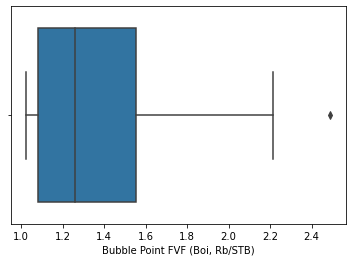

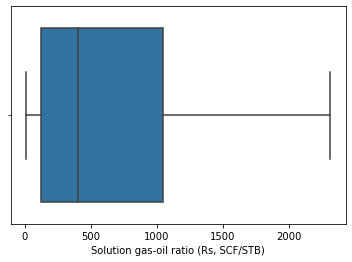

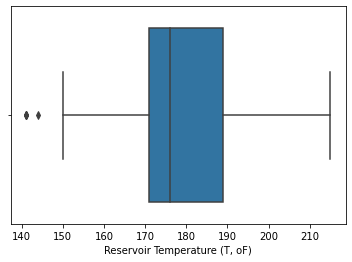

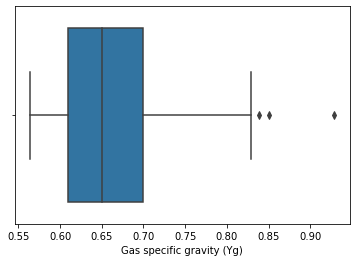

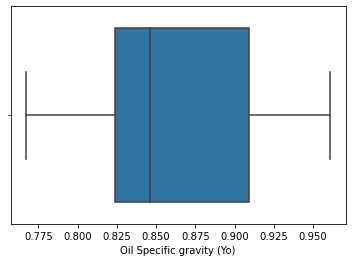

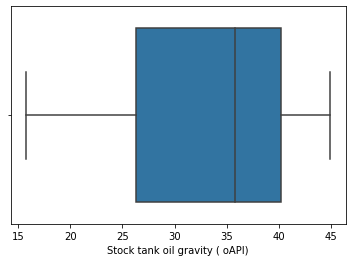

In [22]:
# Plotting Boxplots to visualize the Outliers
# Outliers show as dots to the left or right of the whiskers

for each in df.columns:
    sns.boxplot(df[each])
    plt.show()

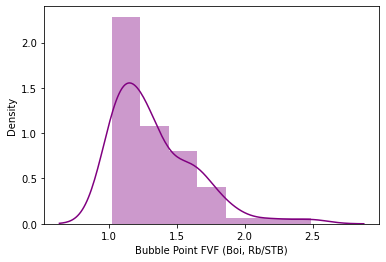

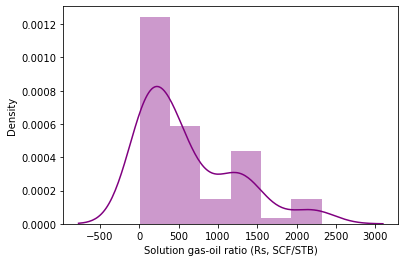

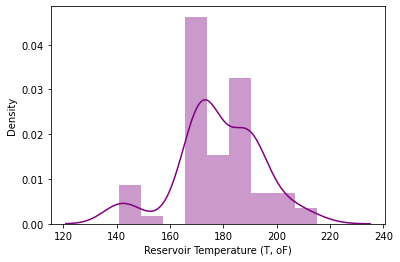

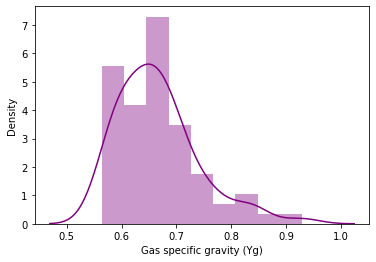

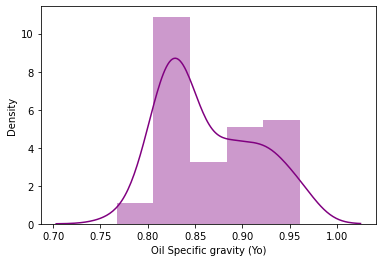

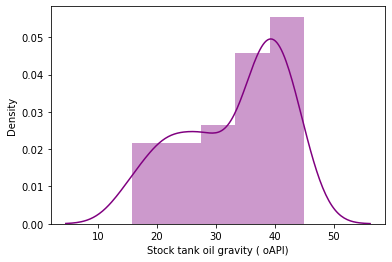

In [23]:
for each in df.columns:
    sns.distplot(df[each], hist=1, color = 'purple', kde=True)
    plt.show()

# 3. Bivariate Analysis

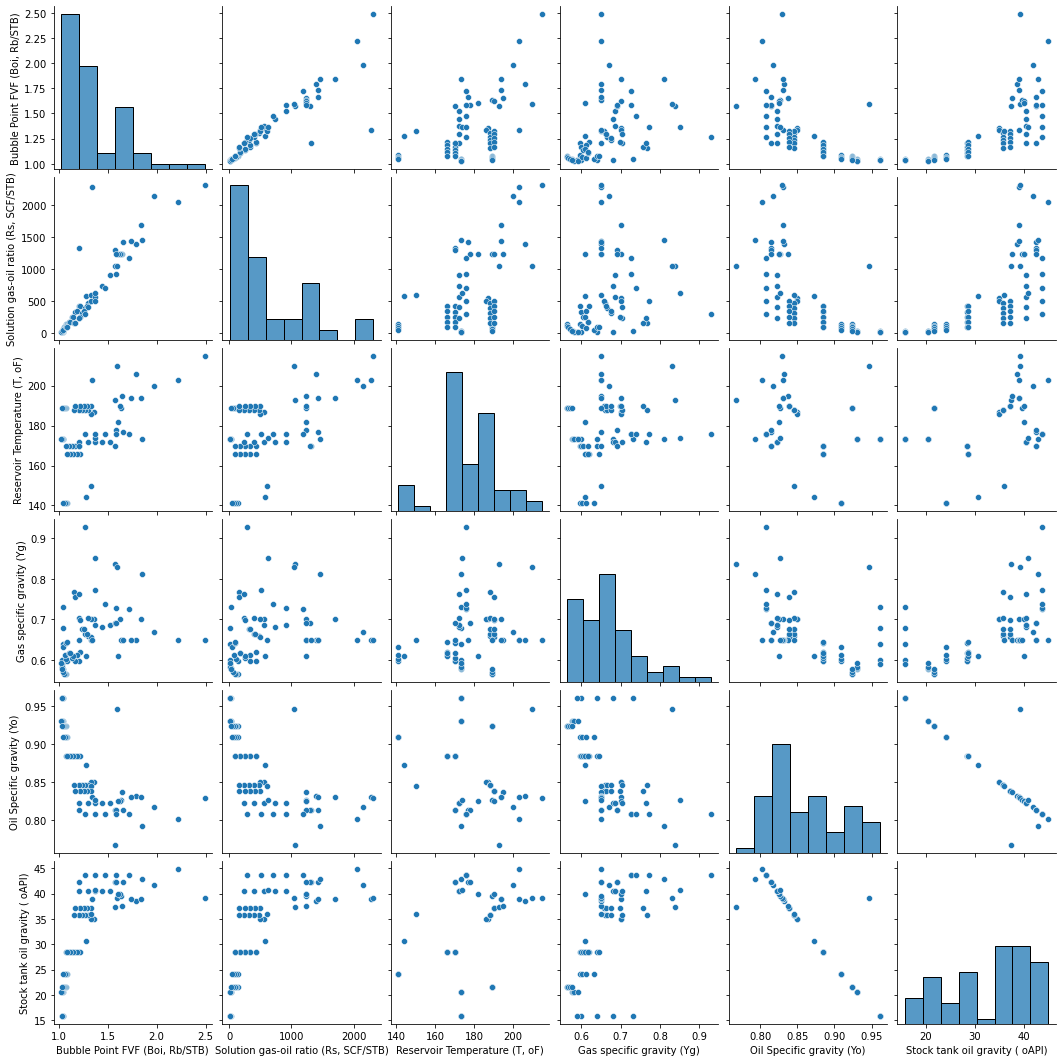

In [24]:
# Plotting Pairplots using Seaborns Library and the Kernel Density estimator on the Diagonal
#Check out all plots, look for possible relationships (linear?)

sns.pairplot(df , diag_kind = 'auto', corner=False, palette="husl")
plt.show()

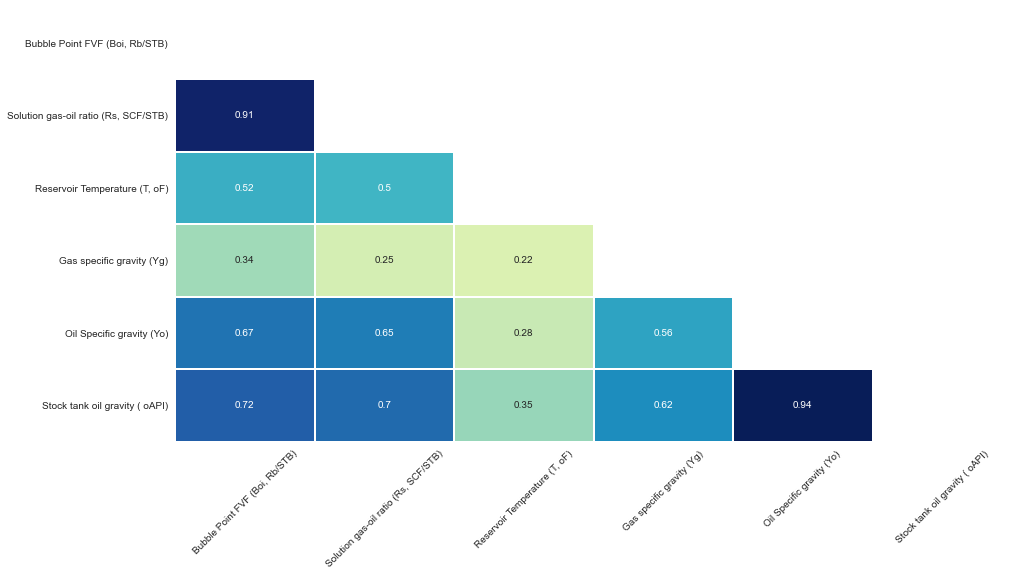

In [24]:
# Getting the Correlations between the attributes

corr = abs(df.corr()) # correlation matrix

lower_triangle = np.tril(corr, k = -1)  # selecting only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size

sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'YlGnBu', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 45)   # Improve readability
plt.yticks(rotation = 0)   
plt.show()

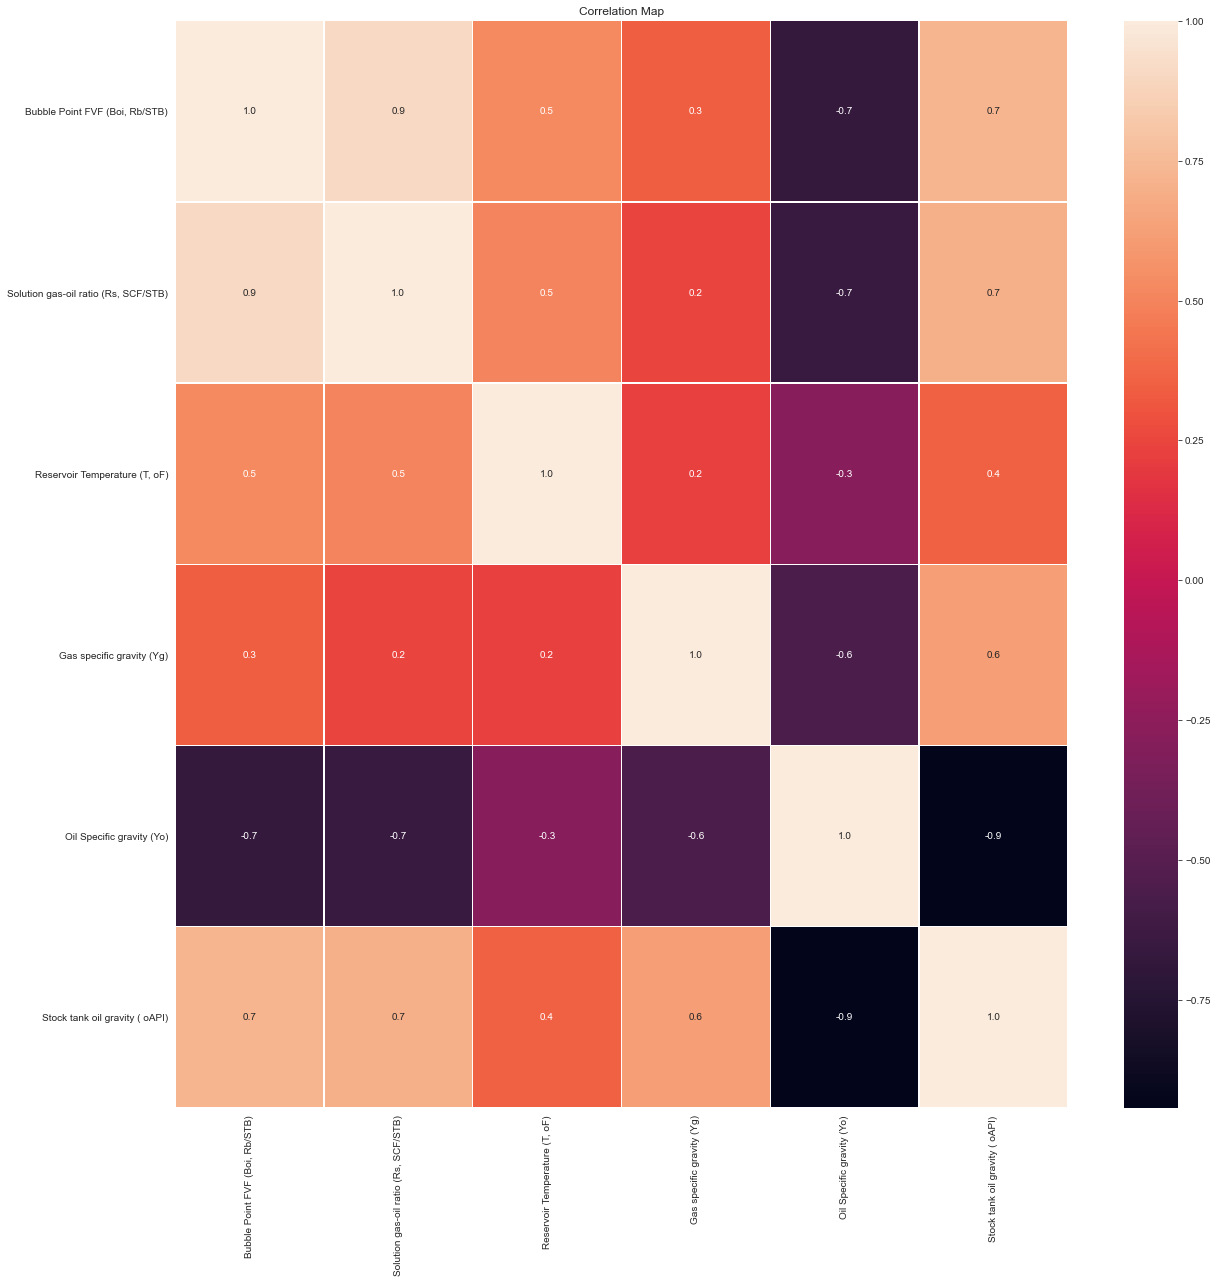

In [73]:
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()


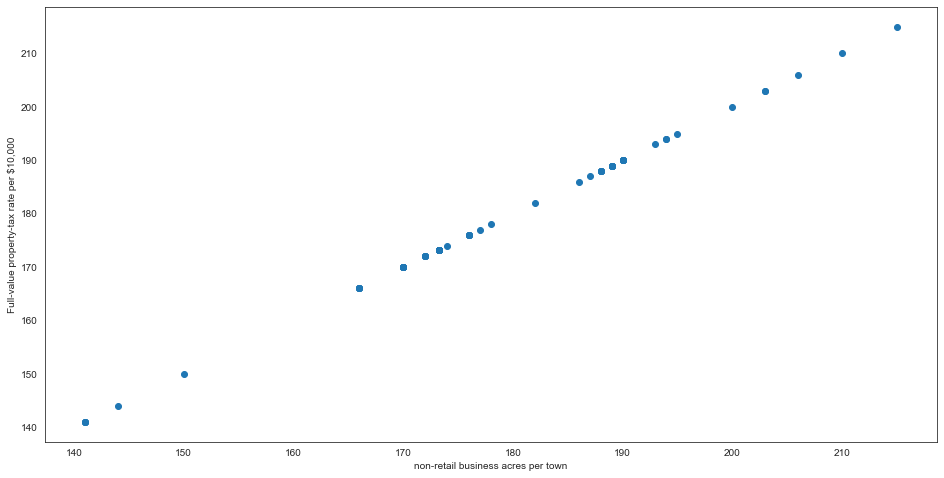

In [25]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df['Reservoir Temperature (T, oF)'], df['Reservoir Temperature (T, oF)'])  # scatter plot
ax.set_xlabel('non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [117]:
df.columns

Index(['Bubble Point FVF (Boi, Rb/STB)',
       'Solution gas-oil ratio (Rs, SCF/STB)', 'Reservoir Temperature (T, oF)',
       'Gas specific gravity (Yg)', 'Oil Specific gravity (Yo)',
       'Stock tank oil gravity ( oAPI)'],
      dtype='object')

In [123]:
from sklearn.preprocessing import MinMaxScaler
range_scaler = MinMaxScaler(feature_range=(0.1, 1))
df_new = range_scaler.fit(df)
df_new = range_scaler.transform(df)
df_new1 = pd.DataFrame(df_new, columns=['Bubble Point FVF (Boi, Rb/STB)',
       'Solution gas-oil ratio (Rs, SCF/STB)', 'Reservoir Temperature (T, oF)',
       'Gas specific gravity (Yg)', 'Oil Specific gravity (Yo)',
       'Stock tank oil gravity ( oAPI)'])
df_new1

,"Bubble Point FVF (Boi, Rb/STB)","Solution gas-oil ratio (Rs, SCF/STB)","Reservoir Temperature (T, oF)",Gas specific gravity (Yg),Oil Specific gravity (Yo),Stock tank oil gravity ( oAPI)
0,0.114724,0.106311,0.129481,0.509315,1.000000,0.100000
1,0.111043,0.105126,0.129481,0.386027,1.000000,0.100000
2,0.110429,0.103549,0.129481,0.284932,1.000000,0.100000
3,0.109202,0.101971,0.129481,0.188767,1.000000,0.100000
4,0.107975,0.100000,0.129481,0.164110,1.000000,0.100000
...,...,...,...,...,...,...
66,0.446012,0.453374,0.490950,0.501918,0.290206,0.959722
67,0.376074,0.369369,0.490950,0.529041,0.290206,0.959722
68,0.312270,0.294829,0.490950,0.615342,0.290206,0.959722
69,0.250920,0.211612,0.490950,1.000000,0.290206,0.959722


In [121]:
df_new1[df_new1.duplicated()==True]

,"Bubble Point FVF (Boi, Rb/STB)","Solution gas-oil ratio (Rs, SCF/STB)","Reservoir Temperature (T, oF)",Gas specific gravity (Yg),Oil Specific gravity (Yo),Stock tank oil gravity ( oAPI)


# 4. Feature Engineering Techniques

In [115]:
# Separating dependent and independent variables

x = df.drop(['Solution gas-oil ratio (Rs, SCF/STB)'],axis=1)
y = df['Solution gas-oil ratio (Rs, SCF/STB)']
x

# or

#x = df.iloc[:, 1:]
#y = df.iloc[:, 0]

# Use aby one that you understand better, they both do the same thing

,"Bubble Point FVF (Boi, Rb/STB)","Reservoir Temperature (T, oF)",Gas specific gravity (Yg),Oil Specific gravity (Yo),Stock tank oil gravity ( oAPI)
0,1.047,127.004,0.730,0.961,15.742456
1,1.041,127.004,0.680,0.961,15.742456
2,1.040,127.004,0.639,0.961,15.742456
3,1.038,127.004,0.600,0.961,15.742456
4,1.036,127.004,0.590,0.961,15.742456
...,...,...,...,...,...
66,1.587,176.000,0.727,0.808,43.623762
67,1.473,176.000,0.738,0.808,43.623762
68,1.369,176.000,0.773,0.808,43.623762
69,1.269,176.000,0.929,0.808,43.623762


In [27]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

#test size is 30% and 70% will be used to train the data, you can mantain random state as 7 in yours Amara
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=6)

In [28]:
[x_train.shape,y_train.shape,x_test.shape,y_test.shape]

[(49, 5), (49,), (22, 5), (22,)]

In [29]:
# Decision Tree Model with degree = 1

#import the regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#create a regressor object
model = DecisionTreeRegressor(random_state=6)


#fit the regressor
model.fit(x_train,y_train)


print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
0.9366216220987067


In [32]:
pred = model.predict(x_test)
pred

array([  20.22523 ,  571.      ,  293.29391 ,  231.601905,   58.659905,
        415.66722 ,   58.659905,  293.29391 , 1296.      , 1177.224055,
       1240.      ,  231.601905, 1395.      , 2315.      ,  293.29391 ,
       1296.      ,   27.305745,  571.      ,  506.691985, 1177.224055,
        506.691985,  111.249995])

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
rmse

135.75085857298265

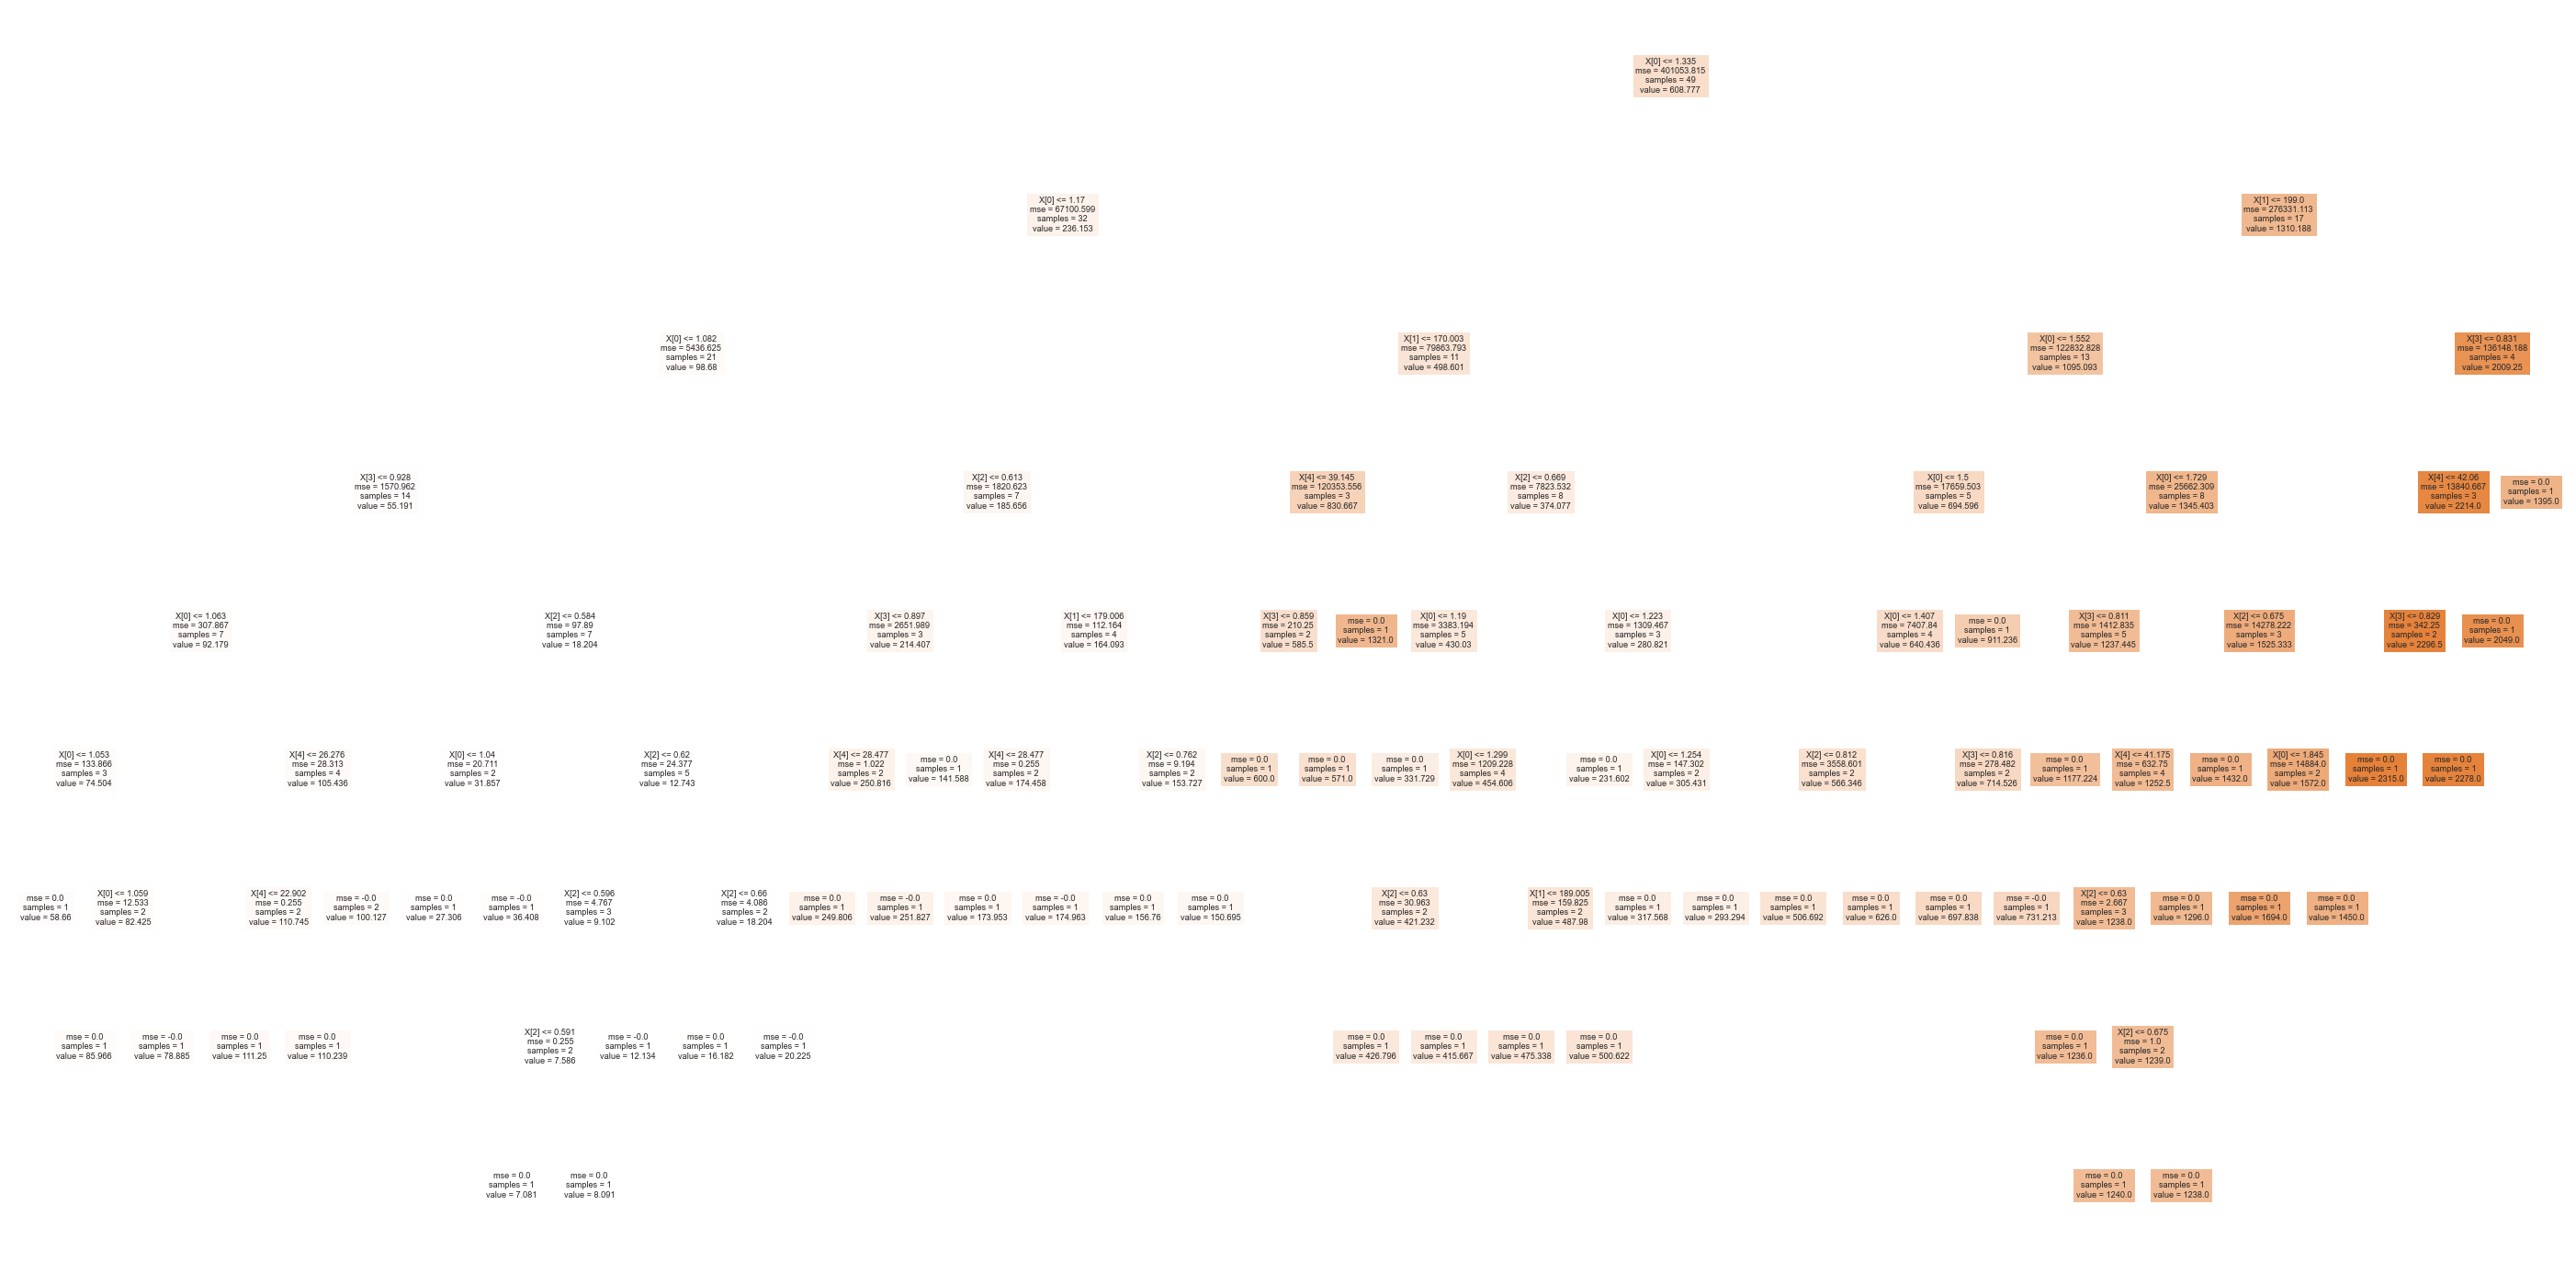

In [33]:
fig = plt.figure(figsize=(50,25))
tree.plot_tree(model, filled= True)
plt.show()

In [34]:
# Decision Tree Model with degree = 1

#import the regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#create a regressor object
model = DecisionTreeRegressor(random_state=6)

#fit the regressor
model.fit(x_train,y_train)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
0.9366216220987067


In [35]:
### Using Pipeline to create Decision Tree Model with Degree = 1

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=1, interaction_only=True,include_bias=True)),
    ('reg', DecisionTreeRegressor(random_state=6))
])

#pipeline.fit(x_train,y_train)

#print(pipeline.score(x_train,y_train))

#print(pipeline.score(x_test,y_test))

In [36]:
### Using Pipeline to create Decision Tree Model with Degree = 2

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('reg', DecisionTreeRegressor(random_state=6))
])

#pipeline.fit(x_train,y_train)

#print(pipeline.score(x_train,y_train))

#print(pipeline.score(x_test,y_test))

In [37]:
### Using Pipeline to create Decision Tree Model with Degree = 3

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('reg', DecisionTreeRegressor(random_state=6))
])

#pipeline.fit(x_train,y_train)

#print(pipeline.score(x_train,y_train))

#print(pipeline.score(x_test,y_test))

In [38]:
# I am creating a list of lists

models_list=[['Ridge',RidgeCV()],
             ['Lasso',LassoCV()],
             ['DT',DecisionTreeRegressor()],
             ['Random Forrest Regressor',RandomForestRegressor()],
             ['AdaBoost',AdaBoostRegressor()],
             ['GB Regressor',GradientBoostingRegressor()]]



In [39]:
# Creating dataframe to rank the performance measures of our different models

res= pd.DataFrame({'Model':[],
                  'R2 Train':[],
                   'R2 Test':[],
                   'MAPE Train':[],
                   'MAPE Test':[]})

In [40]:
res

,Model,R2 Train,R2 Test,MAPE Train,MAPE Test


In [41]:
from sklearn.model_selection import cross_val_score,KFold

#The Theory behing Cross Validation and Kfold, I might teach you or you can read it up

k =  KFold(random_state=6, n_splits=7, shuffle = True)

# KFold will split the data in 3 equal parts

In [42]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

# Blanks list to store model name, cross validated r2 score (mean and standard deviation) and RMSE

In [43]:
# Building a simple Linear Regression Model

from sklearn.linear_model import LinearRegression

#In order to scale our data we need to import standard Scaler
from sklearn.preprocessing import StandardScaler

# Creating a pipeline to help us do like 2 steps at once
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])


#Appending the output
algo.append('Linear Regression')

# Appending all the metrics we will use to analyse the accuracy to the previously created Data frame
cv_r2_mean.append(cross_val_score(pipeline, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [44]:
# Decision Tree

model = DecisionTreeRegressor(random_state=6)

#In order to scale our data we need to import standard Scaler
from sklearn.preprocessing import StandardScaler

# Creating a pipeline to help us do like 2 steps at once
pipeline1 = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', DecisionTreeRegressor())
])

algo.append('Decision Tree')
cv_r2_mean.append(cross_val_score(pipeline1, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline1, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline1, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [45]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=6)

#In order to scale our data we need to import standard Scaler
from sklearn.preprocessing import StandardScaler

# Creating a pipeline to help us do like 2 steps at once
pipeline2 = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', RandomForestRegressor())
])


algo.append('Random Forest')
cv_r2_mean.append(cross_val_score(pipeline2, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline2, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline2, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [46]:
# Bagging
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=6)

#In order to scale our data we need to import standard Scaler
from sklearn.preprocessing import StandardScaler

# Creating a pipeline to help us do like 2 steps at once
pipeline3 = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', BaggingRegressor())
])


algo.append('Bagging')
cv_r2_mean.append(cross_val_score(pipeline3, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline3, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline3, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [47]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=6)

#In order to scale our data we need to import standard Scaler
from sklearn.preprocessing import StandardScaler

# Creating a pipeline to help us do like 2 steps at once
pipeline4 = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', BaggingRegressor())
])

algo.append('AdaBoost')
cv_r2_mean.append(cross_val_score(pipeline4, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline4, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline4, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [48]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=6)

#In order to scale our data we need to import standard Scaler
from sklearn.preprocessing import StandardScaler

# Creating a pipeline to help us do like 2 steps at once
pipeline5 = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', BaggingRegressor())
])

algo.append('Gradient Boosting')
cv_r2_mean.append(cross_val_score(pipeline5, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline5, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline5, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [49]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo

results['CV R2 score mean'] = cv_r2_mean

results
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

,CV R2 score mean,CV R2 score std,CV RMSE
Model,,,
Linear Regression,0.646281,0.378397,302.604773
Decision Tree,0.459059,0.287530,382.498090
Random Forest,0.733952,0.250351,315.174889
Bagging,0.745259,0.335655,310.695558
AdaBoost,0.655035,0.229117,308.275331
Gradient Boosting,0.647933,0.262845,328.106681


## EXPERIMENTING WITH GRID SEARCH/ (optimizing the models)


In [50]:
model= []
tr = []
te = []
rmse = []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

params = {
    'normalize': [True,False],
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'n_jobs': [-1,None,1,2,3,4],
}    

grid = GridSearchCV(estimator =lr, param_grid = params, cv = k)

grid.fit(x_train,y_train)


from sklearn.metrics import mean_squared_error
model.append('Linear regression after Grid search')
tr.append(grid.score(x_train,y_train))
te.append(grid.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,grid.predict(x_test))**0.5)
cv_r2_mean.append(grid.score(x_train, y_train).mean())
cv_r2_std.append(grid.score(x_train, y_train).std())
cv_rmse_mean.append((grid.score(x_train, y_train).mean())**0.5)


grid.best_params_


{'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'normalize': True}

In [52]:
y_train.size

49

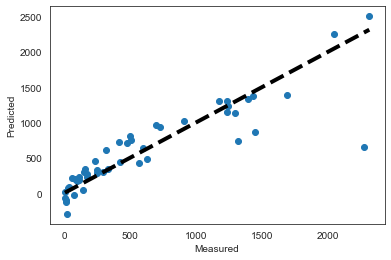

In [53]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, x_train, y_train, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

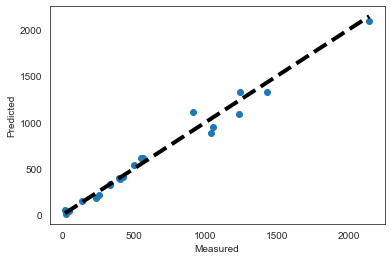

In [54]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, x_test, y_test, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=7)

params = {
    'max_depth': [3,4,5,None],
    'max_features': ['sqrt','log2','auto'],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2,3,4,5],
}    

grid = GridSearchCV(estimator = dt, param_grid = params, cv = k)

grid.fit(x_train,y_train)



from sklearn.metrics import mean_squared_error
model.append('Decision tree after Grid search')
tr.append(grid.score(x_train,y_train))
te.append(grid.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,grid.predict(x_test))**0.5)
cv_r2_mean.append(grid.score(x_train, y_train).mean())
cv_r2_std.append(grid.score(x_train, y_train).std())
cv_rmse_mean.append((grid.score(x_train, y_train).mean())**0.5)

grid.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

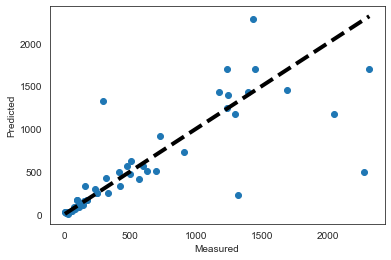

In [56]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(dt, x_train, y_train, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

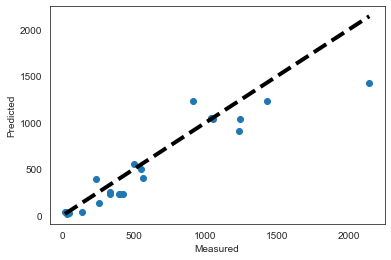

In [57]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(dt, x_test, y_test, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV

br = BaggingRegressor(random_state=7)

params = {
    'max_samples': [20,25,30],
    'max_features': [2,8,2.5],
    'n_estimators': [15,20],
}    

grid = GridSearchCV(estimator = br, param_grid = params, cv = k)

grid.fit(x_train,y_train)



from sklearn.metrics import mean_squared_error
model.append('Bagging Regressor after Grid search')
tr.append(grid.score(x_train,y_train))
te.append(grid.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,grid.predict(x_test))**0.5)
cv_r2_mean.append(grid.score(x_train, y_train).mean())
cv_r2_std.append(grid.score(x_train, y_train).std())
cv_rmse_mean.append((grid.score(x_train, y_train).mean())**0.5)

grid.best_params_


{'max_features': 2, 'max_samples': 20, 'n_estimators': 20}

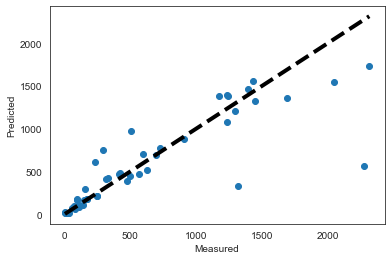

In [59]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(br, x_train, y_train, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

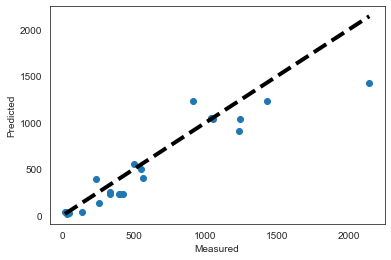

In [60]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(dt, x_test, y_test, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [61]:
#BaggingRegressor().get_params().keys()

## Experimenting with Random search

from sklearn.model_selection import RandomizedSearchCV

lr = LinearRegression()

params_r = {
    'normalize': [True,False],
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'n_jobs': [-1,None,1,2,3,4],
}    

random = RandomizedSearchCV(estimator=lr, param_distributions=params_r, n_iter=50, cv = k, random_state=6)

random.fit(x_train,y_train)


from sklearn.metrics import mean_squared_error
model.append('Linear regression after Random search')
tr.append(random.score(x_train,y_train))
te.append(random.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,random.predict(x_test))**0.5)



random.best_params_

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor( random_state=7)

params_r = {
    'bootstrap': [True,False],
    'max_depth': [3,4,None],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,4,5],
    'n_estimators': [25,50,'warn'],
}     

random = RandomizedSearchCV(estimator=rf, param_distributions=params_r, n_iter=50, cv = k, random_state=6)

random.fit(x_train,y_train)


from sklearn.metrics import mean_squared_error
model.append('Random Forest after Random search')
tr.append(random.score(x_train,y_train))
te.append(random.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,random.predict(x_test))**0.5)



random.best_params_

from sklearn.model_selection import RandomizedSearchCV

br = BaggingRegressor(random_state=7)
br.fit(x_train,y_train)

params_r = {
    'max_samples': [25,30,50],
    'max_features': [1,2,8],
    'n_estimators': [50,112,150],
}    

random = RandomizedSearchCV(estimator=br, param_distributions=params_r, n_iter=50, cv = k, random_state=7)

random.fit(x_train,y_train)


from sklearn.metrics import mean_squared_error
model.append('Bagging regression after Random search')
tr.append(random.score(x_train,y_train))
te.append(random.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,random.predict(x_test))**0.5)



random.best_params_


In [62]:
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor(random_state=7)
gb.fit(x_train,y_train)

# Number of trees in Gradient boosting
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 25 numbers

# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate':learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 7 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k, random_state=7)

# Fit the random search model
random.fit(x_train, y_train)

model.append('Gradient Boosting after RandomCV')
tr.append(random.score(x_train,y_train))
te.append(random.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,random.predict(x_test))**0.5)
cv_r2_mean.append(random.score(x_train, y_train).mean())
cv_r2_std.append(random.score(x_train, y_train).std())
cv_rmse_mean.append((random.score(x_train, y_train).mean())**0.5)

random.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}

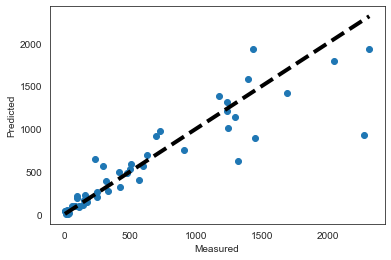

In [63]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(random, x_train, y_train, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

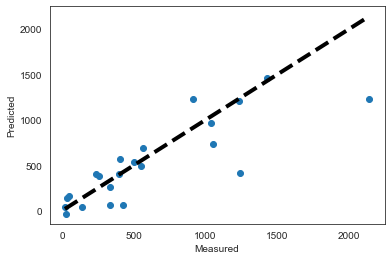

In [64]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(random, x_test, y_test, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [74]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=7)
rf.fit(x_train,y_train)


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 25 numbers

# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]




params = {
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators,
}    
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 7 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=rf, param_distributions=params,cv = k, random_state=7)

# Fit the random search model
random.fit(x_train, y_train)

model.append('RandomForest regressor after RandomCV')
tr.append(random.score(x_train,y_train))
te.append(random.score(x_test,y_test))
predict = random.predict(x_test)
rmse.append(mean_squared_error(y_test,random.predict(x_test))**0.5)
cv_r2_mean.append(random.score(x_train, y_train).mean())
cv_r2_std.append(random.score(x_train, y_train).std())
cv_rmse_mean.append((random.score(x_train, y_train).mean())**0.5)

random.best_params_

{'n_estimators': 129,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [78]:
predict.size

22

In [87]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predict)

116.84316133815055

In [85]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,predict)*100

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

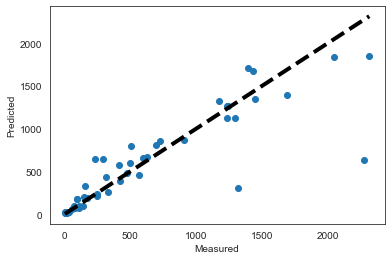

In [66]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(rf, x_train, y_train, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

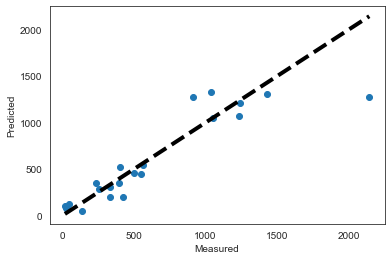

In [67]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(rf, x_test, y_test, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [68]:
from sklearn.model_selection import RandomizedSearchCV

ab = AdaBoostRegressor(random_state=7)
ab.fit(x_train,y_train)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 25 numbers
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'learning_rate':learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=ab, param_distributions=params_r,cv = k, random_state=7)

# Fit the random search model
random.fit(x_train, y_train)

model.append('Ada Boost after RandomCV')
tr.append(random.score(x_train,y_train))
te.append(random.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,random.predict(x_test))**0.5)
cv_r2_mean.append(random.score(x_train, y_train).mean())
cv_r2_std.append(random.score(x_train, y_train).std())
cv_rmse_mean.append((random.score(x_train, y_train).mean())**0.5)

random.best_params_

{'n_estimators': 141, 'learning_rate': 0.5}

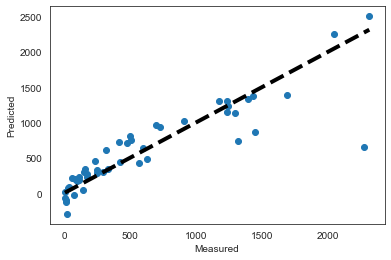

In [69]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, x_train, y_train, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

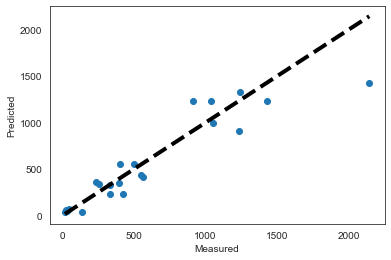

In [70]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(ab, x_test, y_test, cv=k)
y_pred

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [71]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results['cv_r2_mean'] = cv_r2_mean
results['cv_r2_std'] = cv_r2_std
results['cv_rmse_mean'] = cv_rmse_mean
results = results.set_index('Model')
results

,Training Score,Testing Score,RMSE,cv_r2_mean,cv_r2_std,cv_rmse_mean
Model,,,,,,
Linear regression after Grid search,0.830904,0.848676,209.761888,0.830904,0.0,0.911539
Decision tree after Grid search,0.980771,0.649645,319.173068,0.980771,0.0,0.990339
Bagging Regressor after Grid search,0.862749,0.703010,293.861762,0.862749,0.0,0.928843
Gradient Boosting after RandomCV,0.998703,0.948012,122.949144,0.998703,0.0,0.999351
RandomForest regressor after RandomCV,0.964588,0.909120,162.557160,0.964588,0.0,0.982134
Ada Boost after RandomCV,0.984069,0.923335,149.303475,0.984069,0.0,0.992003
